In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [2]:
import pandas as pd
import numpy as np

In [3]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
train= get_training_data('../data/chest_xray/train')
test= get_training_data('../data/chest_xray/test')
val = get_training_data('..data/chest_xray/val')

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



FileNotFoundError: [WinError 3] The system cannot find the path specified: '..data/chest_xray/val\\PNEUMONIA'

In [6]:
train.shape
test.shape

(624, 2)

In [7]:
val = get_training_data('../data/chest_xray/val')
val.shape

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



(16, 2)

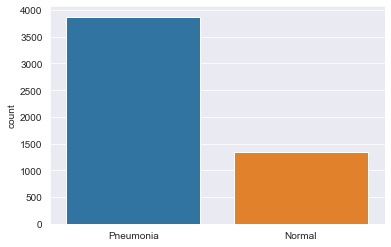

In [8]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)  

In [1]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='rgb')
plt.title(labels[train[-1][1]])


NameError: name 'plt' is not defined

In [13]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [14]:
x_train[1].shape

(150, 150)

In [15]:
X_train = np.array(x_train)/255

In [16]:
X_train.shape

(5216, 150, 150)

In [17]:
x_val= np.array(x_val)/ 255

In [19]:
x_test= np.array(x_test)/ 255

In [20]:
x_train= X_train.reshape(-1, img_size, img_size, 1)
y_train= np.array(y_train)

x_val= x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test= np.array(y_test)

In [21]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [22]:
model= Sequential()
model.add(Conv2D(32, (3,3), strides =1, padding = 'same', activation ='relu', input_shape = (150,150,1)))
model.add(MaxPool2D((2,2), strides=2, padding='same')
model.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='relu'))
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

TypeError: add() got an unexpected keyword argument 'strides'

In [25]:
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='relu'))
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 92416)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               11829376  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [26]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [27]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 81s 496ms/step - loss: 0.5559 - accuracy: 0.7611 - val_loss: 1.1684 - val_accuracy: 0.5625
Epoch 2/12
163/163 [==============================] - 76s 465ms/step - loss: 0.3360 - accuracy: 0.8491 - val_loss: 1.6643 - val_accuracy: 0.5625
Epoch 3/12
163/163 [==============================] - 77s 475ms/step - loss: 0.2943 - accuracy: 0.8715 - val_loss: 1.8606 - val_accuracy: 0.6250
Epoch 4/12
163/163 [==============================] - 78s 476ms/step - loss: 0.2631 - accuracy: 0.8907 - val_loss: 0.7405 - val_accuracy: 0.8750
Epoch 5/12
163/163 [==============================] - 78s 481ms/step - loss: 0.2416 - accuracy: 0.8997 - val_loss: 1.5109 - val_accuracy: 0.6875
Epoch 6/12
163/163 [==============================] - ETA: 0s - loss: 0.2262 - accuracy: 0.9101
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 78s 478ms/step - loss: 0.2262 - accuracy: 0.9101 - val_l

In [28]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 2s 116ms/step - loss: 0.3483 - accuracy: 0.9071
Loss of the model is -  0.34830036759376526
20/20 [==============================] - 2s 116ms/step - loss: 0.3483 - accuracy: 0.9071
Accuracy of the model is -  90.70512652397156 %


In [29]:
model_2= Sequential()
model_2.add(Conv2D(32, (3,3), strides =1, padding = 'same', activation ='relu', input_shape = (150,150,1)))

model_2.add(MaxPool2D((2,2), strides=2, padding='same'))
model_2.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(MaxPool2D((2,2), strides=2, padding='same'))
model_2.add(MaxPool2D((2,2), strides=2, padding='same'))
model_2.add(Conv2D(64, (3,3), strides =1, padding ='same', activation='relu'))
model_2.add(Dropout(0.2))

model_2.add(Flatten())

model_2.add(Dense(units=128, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(units=1, activation='sigmoid'))
model_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 19, 64)       

In [30]:
history = model_2.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 94s 576ms/step - loss: 0.5003 - accuracy: 0.7701 - val_loss: 0.9524 - val_accuracy: 0.6250
Epoch 2/12
163/163 [==============================] - 92s 563ms/step - loss: 0.3247 - accuracy: 0.8637 - val_loss: 1.1356 - val_accuracy: 0.6250
Epoch 3/12
163/163 [==============================] - ETA: 0s - loss: 0.2728 - accuracy: 0.8907
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 91s 557ms/step - loss: 0.2728 - accuracy: 0.8907 - val_loss: 0.9551 - val_accuracy: 0.6250
Epoch 4/12
163/163 [==============================] - 90s 553ms/step - loss: 0.2016 - accuracy: 0.9222 - val_loss: 1.3118 - val_accuracy: 0.5625
Epoch 5/12
163/163 [==============================] - ETA: 0s - loss: 0.1906 - accuracy: 0.9245
Epoch 00005: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
163/163 [==============================] - 87s 536ms/step - loss: 0.1906 - accu

In [31]:
print("Loss of the model is - " , model_2.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model_2.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 2s 121ms/step - loss: 0.2537 - accuracy: 0.9167
Loss of the model is -  0.25372201204299927
20/20 [==============================] - 3s 129ms/step - loss: 0.2537 - accuracy: 0.9167
Accuracy of the model is -  91.66666865348816 %
